#Import prerequisite

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bokeh.plotting import show, figure, output_notebook
from bokeh.models import HoverTool
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.preprocessing import LabelEncoder

#import hepatitis(Dataset)

In [36]:
df=pd.read_csv("hepatitis.csv")

In [ ]:
df.shape

(155, 20)

In [3]:
numeric_cols=df.select_dtypes(np.number).columns
cat_cols=df.select_dtypes(exclude=np.number).columns

## null handling

In [4]:
df.isna().sum()

,0
age,0
sex,0
steroid,1
antivirals,0
fatigue,1
malaise,1
anorexia,1
liver_big,10
liver_firm,11
spleen_palpable,5


### NaN handling

In [5]:
imputer=KNNImputer(n_neighbors=3)
imputer=imputer.fit_transform(df[numeric_cols])
df[numeric_cols]=pd.DataFrame(imputer,columns=numeric_cols)


### Null handling

In [6]:
df[cat_cols]=df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Fix categoori To Number

In [10]:
le=LabelEncoder()
for col in cat_cols:
  le.fit(df[col])
  df[col]=le.transform(df[col])

# Fix duplicated

In [12]:
df.duplicated().sum() #0
df.drop_duplicates()

# Data Viz

## 1. show correlation

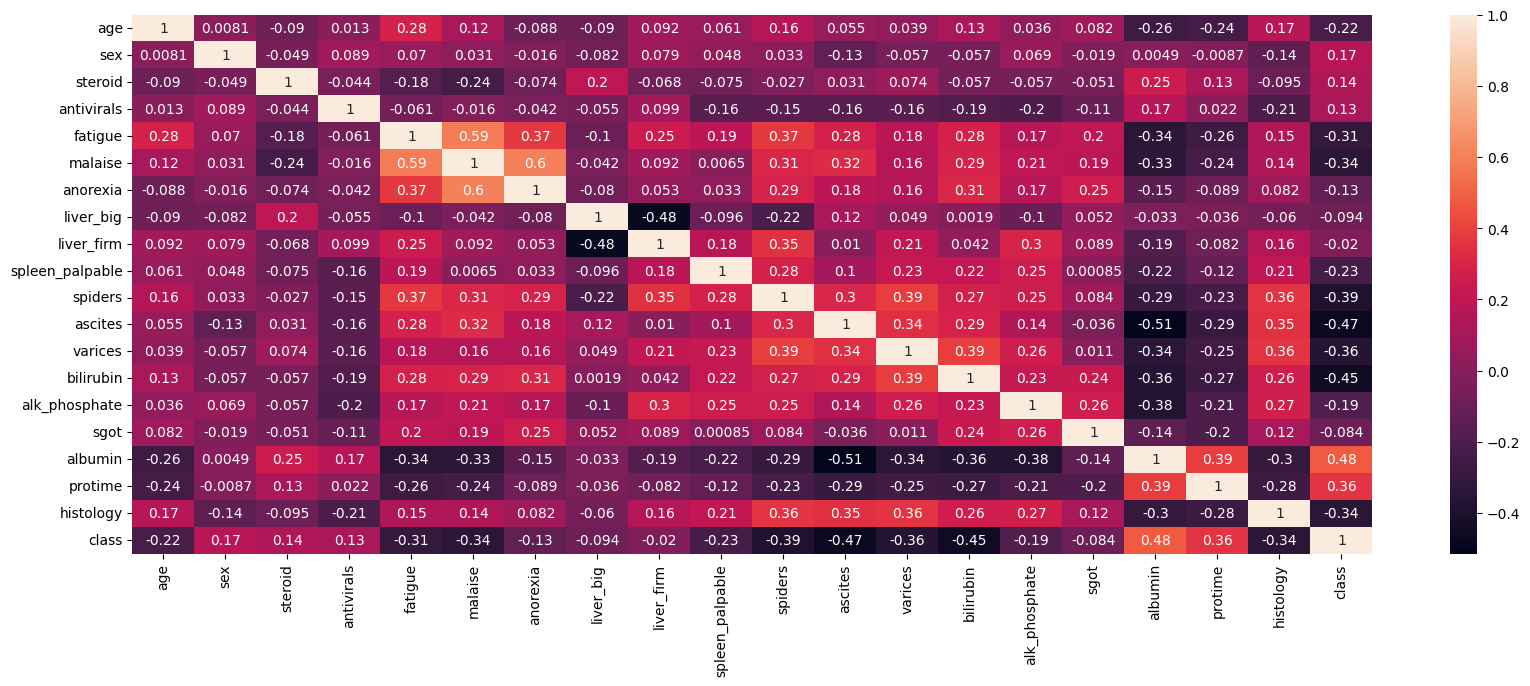

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.rcParams['figure.figsize']=(22,8)
plt.show()

## 2. Line Chart

In [18]:
age_count = df['age'].value_counts().sort_index()

### 2.1. matplotlib

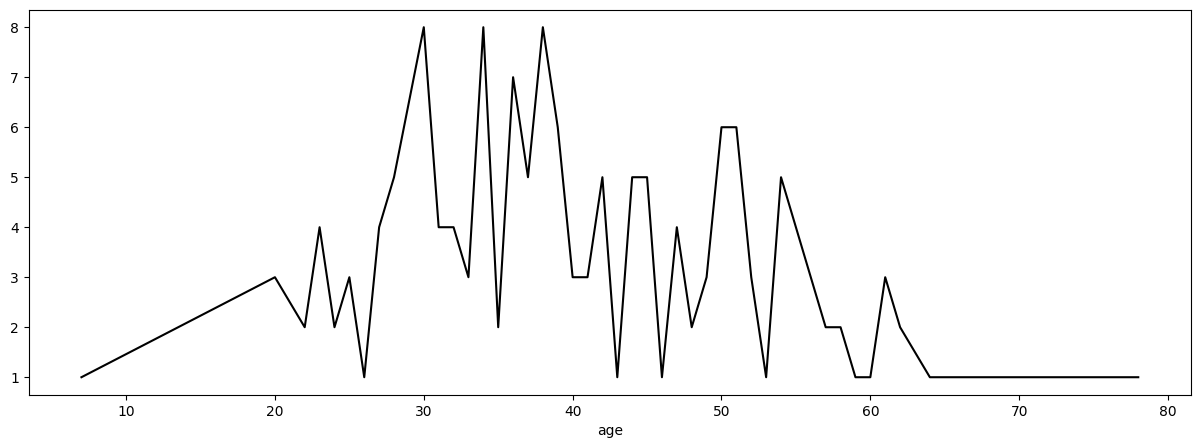

In [15]:
# Age analysis of hepatitis ==> plt
plt.figure(figsize=(15, 5))
plt.plot(age_count, c='black')
plt.xlabel("age")
plt.show()

### 2.2. plotly

In [24]:
fig=px.line(age_count,x=age_count.index,y=age_count.values)
fig.update_layout(title="frequency",xaxis_title="age", yaxis_title="frequency")
fig.update_traces(
    hoverinfo='all',
    hovertemplate='Age: <b>%{x}</b> <br>frequency: <b>%{y}</b>'
)
fig.show()

## 3. Bar Chart

### 3.1. matplotlib

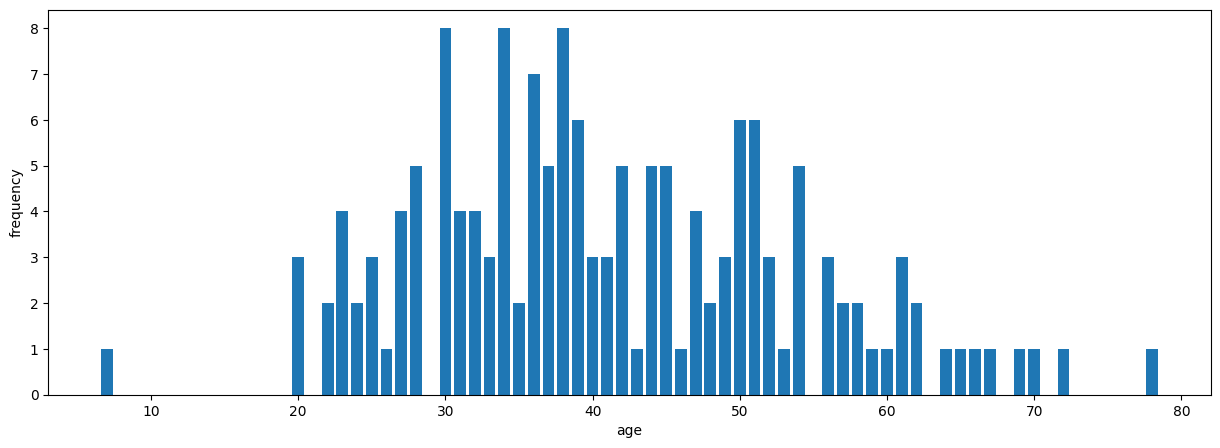

In [31]:
plt.figure(figsize=(15,5))
plt.bar(age_count.index,age_count.values);
plt.title("")
plt.xlabel("age")
plt.ylabel("frequency")
plt.show();

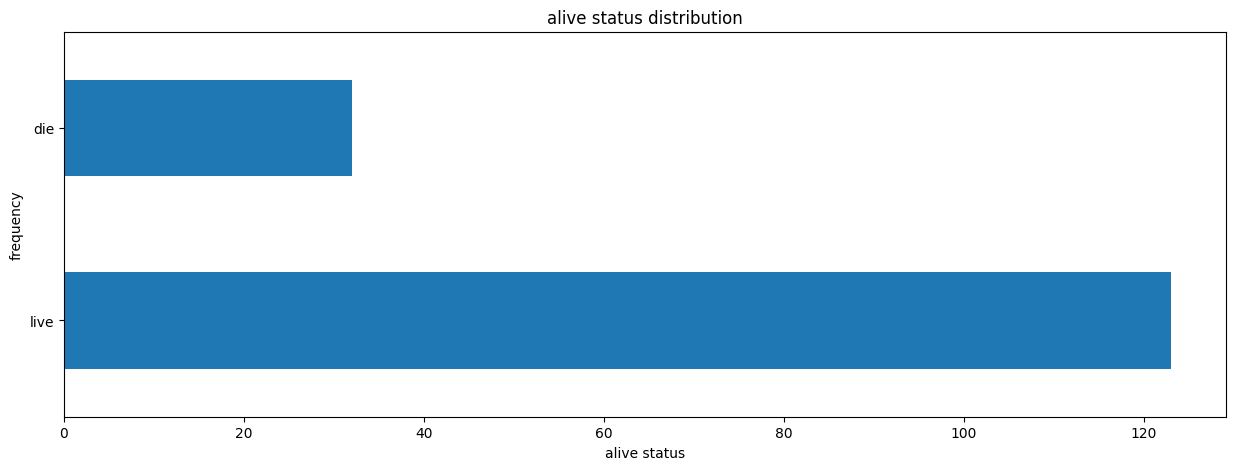

In [37]:
class_count = df['class'].value_counts()
class_count.plot(kind='barh', figsize=(15, 5))
plt.title("alive status distribution")
plt.xlabel("alive status")
plt.ylabel("frequency")
plt.show()

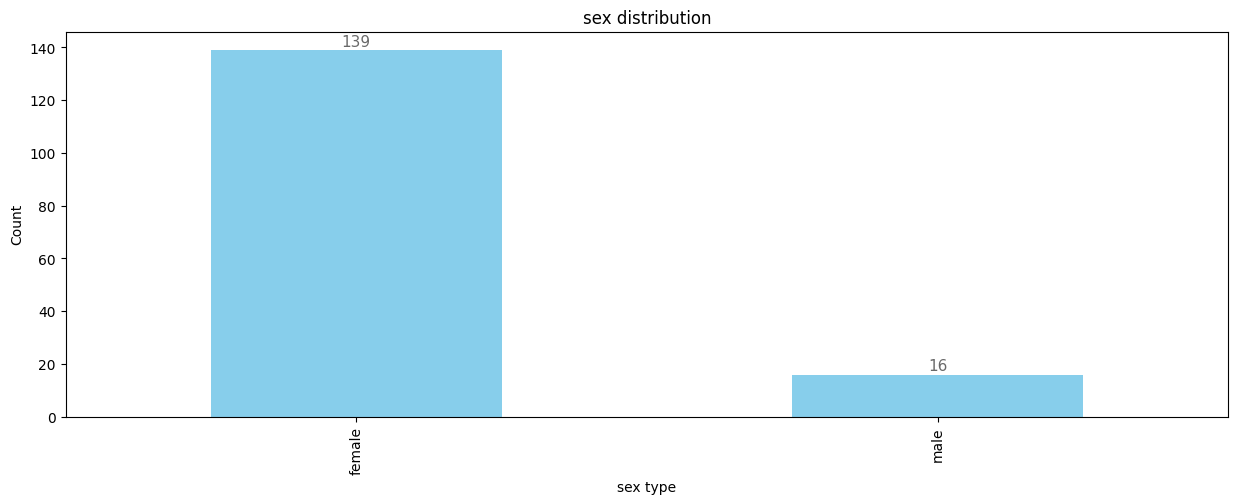

In [38]:
# Assuming df is your DataFrame
plt.figure(figsize=(15, 5))

sex_counts = df['sex'].value_counts()

ax = sex_counts.plot(kind='bar', color='skyblue')
plt.title('sex distribution')
plt.xlabel('sex type')
plt.ylabel('Count')

# Adding text labels above the bars
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x() + i.get_width() / 2., i.get_height() + 0.3,
            str(i.get_height()), fontsize=11, color='dimgrey',
            ha='center', va='bottom')

plt.show()

## 4. Histogram

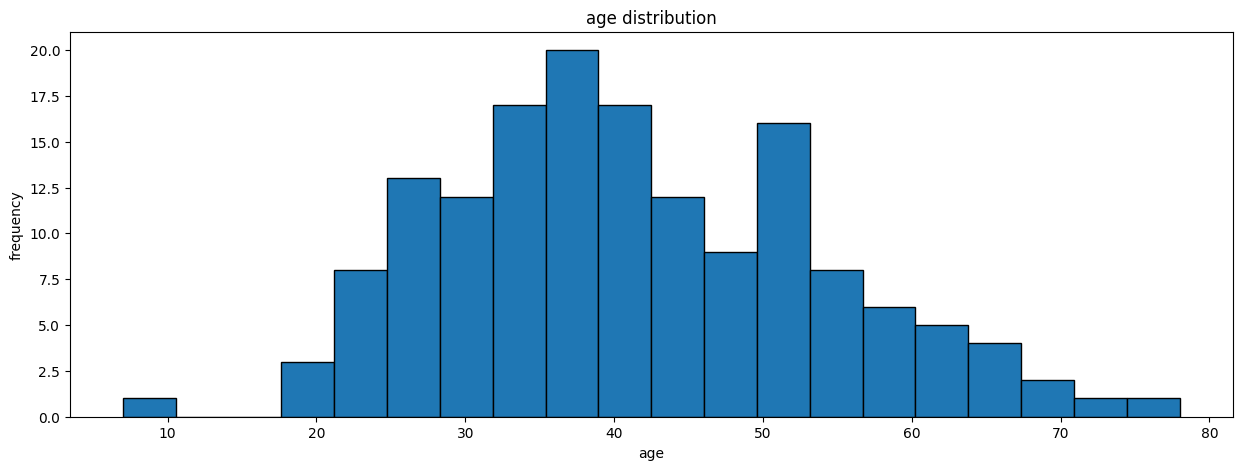

In [39]:
plt.figure(figsize=(15, 5))

plt.hist(df['age'], bins=20, edgecolor='black')
plt.title("age distribution")
plt.xlabel("age")
plt.ylabel("frequency")
plt.show()

## 5. Pie chart

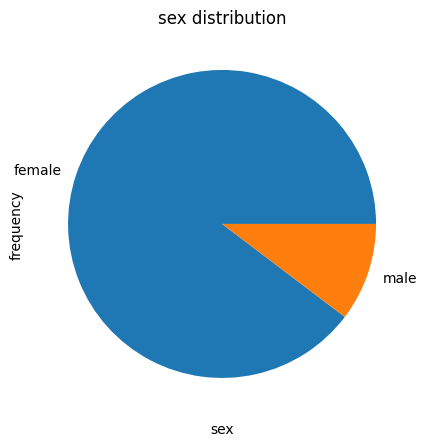

In [40]:
sex_count = df['sex'].value_counts()
sex_count.plot(kind='pie', figsize=(15, 5))
plt.title("sex distribution")
plt.xlabel("sex")
plt.ylabel("frequency")
plt.show()

## 6. 3D Plotting

In [47]:
# Plotly Express interactive 3D scatter plot
fig = px.scatter_3d(df[['protime','albumin','bilirubin','class']], x='protime', y='albumin', z='bilirubin',
                    color='class', title='Interactive 3D Scatter Plot of Iris Dataset',
                    labels={'class': 'alive'})

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()
